In [1]:

# new_file_dump([n_qubits, n_layers, n_terms, n_locality],
#           f'{n_qubits}n_{n_layers}p_{n_terms}t_{n_locality}l_{seed}seed.csv', path)
# file_dump([tf], f'{n_qubits}n_{n_layers}p_{n_terms}t_{n_locality}l_{seed}seed.csv', path)
# file_dump(beta_angle, f'{n_qubits}n_{n_layers}p_{n_terms}t_{n_locality}l_{seed}seed.csv', path)
# file_dump(gamma_angle, f'{n_qubits}n_{n_layers}p_{n_terms}t_{n_locality}l_{seed}seed.csv', path)
# file_dump_np(grid.reshape(grid.shape[0], -1), f'{n_qubits}n_{n_layers}p_{n_terms}t_{n_locality}l_{seed}seed.csv', path)

In [2]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
from matplotlib.ticker import MaxNLocator
from tqdm.notebook import tqdm

In [3]:
def make_data(N, N_seeds, Layers, directory):
    N_layers = len(Layers)
    data = np.zeros((N_layers,N_seeds,N,N,3)) # number of layers, seeds, grid(N,N,3)-> (max, avg, num)

    for filename in tqdm(os.listdir(directory)):
        file = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(file):
            # print(file)
            if str(file).find('/{}n'.format(N)) == -1:
                continue
            with open(file,'r') as f:
                n_q,n_p,n_t,n_l = np.loadtxt(f,max_rows=1,delimiter=',',dtype=int)
                # print(n_q,n_p,n_t,n_l)
                
                grid = np.loadtxt(f,skiprows=3,delimiter=',')
                # print(grid)
                counter_seed = len(np.nonzero(data[Layers.index(n_p),:,0,0,0])[0])
                data[Layers.index(n_p),counter_seed,:,:,:] = grid.reshape((N,N,3))
    return data
        

In [4]:
def make_avg_data(N, N_seeds, Layers, directory):
    N_layers = len(Layers)
    data = np.zeros((N_layers,N,N,3)) # number of layers, seeds, grid(N,N,3)-> (max, avg, num)

    for filename in tqdm(os.listdir(directory)):
        file = os.path.join(directory, filename)
        # checking if it is a file
        if os.path.isfile(file):
            # print(file)
            if str(file).find('/{}n'.format(N)) == -1:
                continue
            with open(file,'r') as f:
                n_q,n_p,n_t,n_l = np.loadtxt(f,max_rows=1,delimiter=',',dtype=int)
                # print(n_q,n_p,n_t,n_l)
                
                grid = np.loadtxt(f,skiprows=3,delimiter=',')
                # print(grid)
                data[Layers.index(n_p),:,:,:] += grid.reshape((N,N,3))/N_seeds
    return data

In [5]:
plt.rcParams["figure.figsize"] = (40,10)

In [6]:
def plot_grid(grid,layer=-1, mode=2):

    localities = [i + 1 for i in range(grid.shape[0])]
    num_of_terms = [i + 1 for i in range(grid.shape[1])]

    param_to_show_name = ''
    if mode == 2:
        param_to_show_name = 'total terms'
    elif mode == 1:
        param_to_show_name = 'average locality'
    else:
        param_to_show_name = 'max locality'

    fig, ax = plt.subplots()

    im = ax.imshow(grid[:,:,mode], interpolation='nearest', cmap='plasma')


    ax.set_xticks(np.arange(len(localities)), labels=localities)
    ax.set_yticks(np.arange(len(num_of_terms)), labels=num_of_terms)
    
    for locality in localities:
        for number_of_terms in num_of_terms:
            ax.text(number_of_terms-1, locality-1, '{:.2f}'.format(grid[locality-1][number_of_terms-1][mode]),  ha='center', va='center',color='black',fontsize = 15,backgroundcolor='w')
            
    ax.set_xlabel('No. of Terms', fontsize = 15)
    ax.set_ylabel('Locality', fontsize = 15)
    if layer==-1:
        ax.set_title('{} qubits, {}'.format(len(localities), param_to_show_name), fontsize = 20)
    else:
        ax.set_title('{} qubits {} layers, {}'.format(len(localities), layer, param_to_show_name), fontsize = 20)
    fig.tight_layout()
    plt.show()

In [7]:
directory = os.fsencode('data/')
N = 10 # Number of qubits, also assuming that max locality and terms = N
N_seeds = 100
Layers = [1,2,3]

In [8]:
data = make_avg_data(N,N_seeds,Layers,directory)

  0%|          | 0/900 [00:00<?, ?it/s]

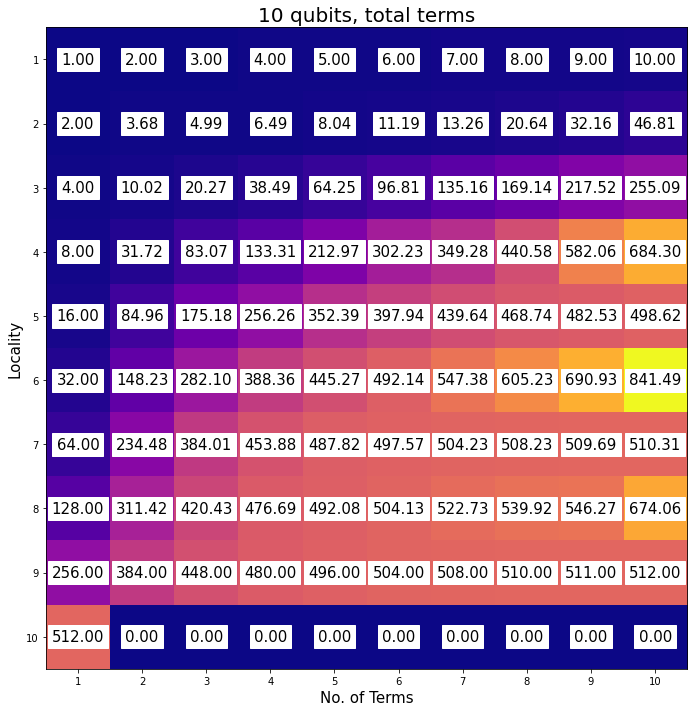

In [14]:
plot_grid(data[1],mode=2)

#--------------------------------------------

In [10]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
# %matplotlib ipympl


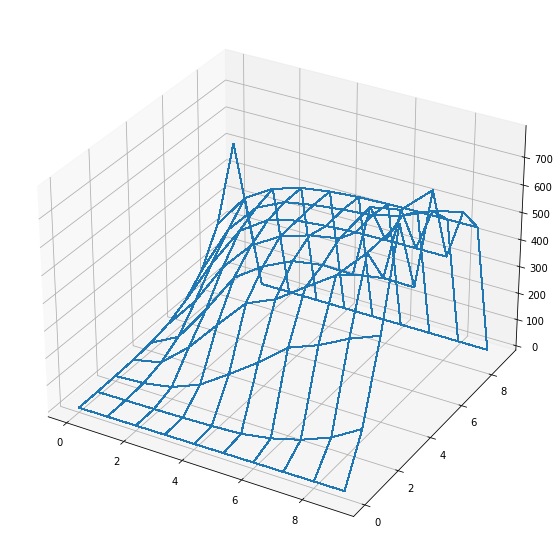

In [11]:

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
i=2
axis = np.array([x for x in range(N)])
X, Y = np.meshgrid(axis, axis)
ax.plot_wireframe(X, Y, data[i][:,:,2],
                       linewidth=1, antialiased=False, rstride=1, cstride=1)
